In [18]:
import pandas as pd
import matplotlib.pyplot as plt
df_fitness = pd.read_csv("../data/clean_smart_fitness_&_nutrition_analytics.csv")
df_fitness_female = df_fitness[df_fitness["gender"] == "female"]
df_fitness_male = df_fitness[df_fitness["gender"] == "male"]

Vamos a observar que para este estudio tenemos datos de hombres y mujeres, en este caso casi la misma cantidad para cada uno de los generos

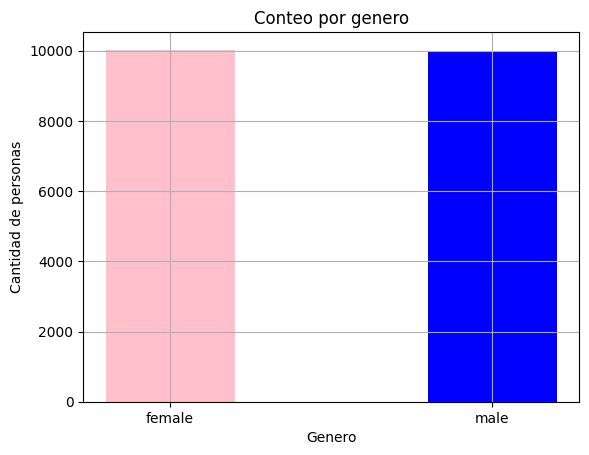

In [19]:
def gender_count(df):
	#contamos el numero de hombres y mujeres
	count = df["gender"].value_counts()
	plt.grid()
	plt.bar(
		["female", "male"],
		[count["female"], count["male"]],
		width = 0.4,
		color = ["pink", "blue"]
	)
	plt.title("Conteo por genero")
	plt.xlabel("Genero")
	plt.ylabel("Cantidad de personas")
	plt.show()
gender_count(df_fitness)

Con la siguiente grafica podemos observar dos cosas, primero notamos que hay mayor cantidad de gente deportista en las personas de 18 años, segundo esto decae enormemente pasando a los 20 y con ello estabilizandose, es curioso ver este cambio tan radical de un ponto a otro y seria interesante el saber porque. Tambien se puede observar que hay muy pocas personas de 59 años que hagan deporte, quizas debido a la edad

(42,)


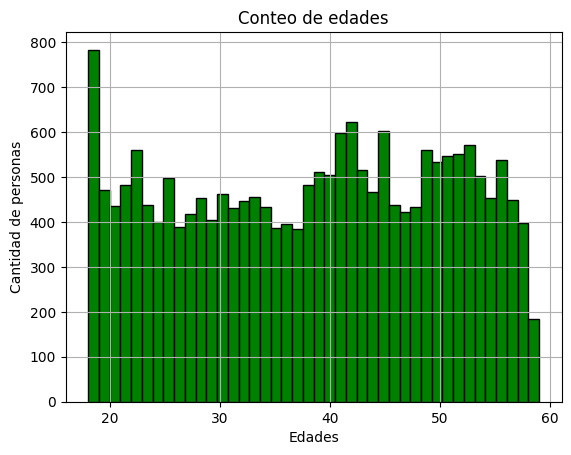

In [20]:
def age_count(df, title, color="green"):
	#con esto veo cuantos valores unicos de edades tengo, en este caso 42
	print(df["age"].value_counts().shape)
	plt.grid()
	plt.hist(
		df["age"],
		bins = 42,
		edgecolor='black',
		color = color
	)
	plt.title(title)
	plt.xlabel("Edades")
	plt.ylabel("Cantidad de personas")
	plt.show()
age_count(df_fitness, "Conteo de edades")

Aqui podemos visualizar las edades segun genero, pero para este caso esta tambien igualado

(42,)


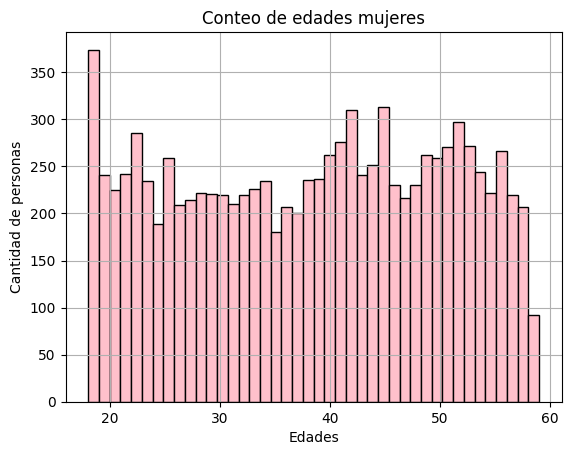

(42,)


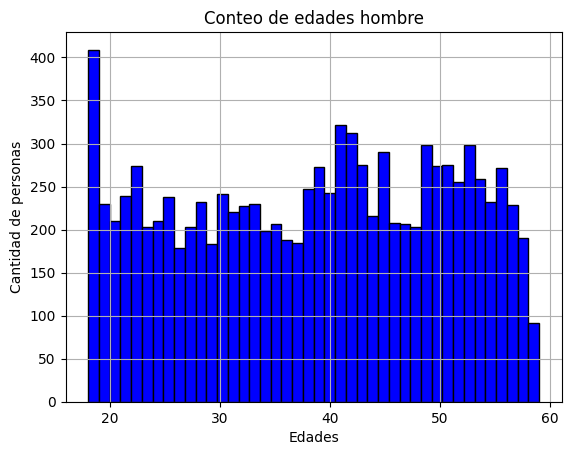

In [21]:
age_count(df_fitness_female, "Conteo de edades mujeres", "pink")
age_count(df_fitness_male, "Conteo de edades hombre", "blue")

En esta grafica podemos ver que no hay nada relacionado de a mayor edad menos desportistas o cosas similares, pero si podemos ver que a lo largo de toda la vida hay deporte

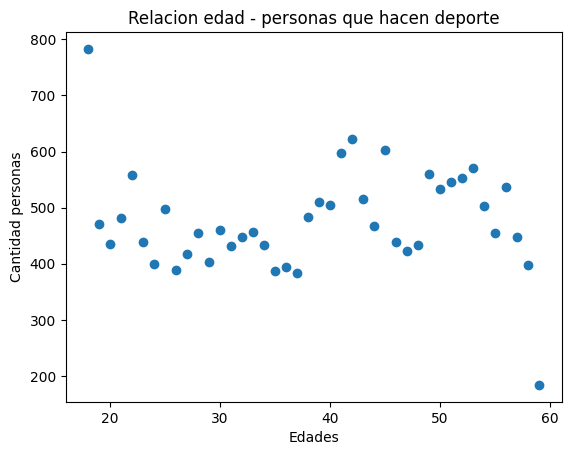

In [22]:
def age_scatter(df):
	#aqui hago una lista con comprehesion list para guardar todas las cuentas de numero de personas  * edad
	cantidad = [i for i in df["age"].value_counts().sort_index()]
	#aqui hago una lista con comprehesion list con los numero del 18 al 60 para luego usarlo en la grafica, esto serian las edades
	index = [i for i in range(18,60)]
	plt.scatter(
		index,
		cantidad
	)
	plt.title("Relacion edad - personas que hacen deporte")
	plt.xlabel("Edades")
	plt.ylabel("Cantidad personas")
	plt.show
age_scatter(df_fitness)

Tenemos aqui el porcentaje de grasa corporal que se tiene para tener un peso normal, sobrepeso o obesidad
*Hombres, Normal: 10-20, Sobrepeso: 20-25, Obesidad: >25 
*Mujeres, Normal: 20-30, Sobrepeso: 30-35, Obesidad: >35
Con ello en mente, podemos ver en las graficas, tanto de hombres como de mujeres, hay una gran cantidad de personas con obesidad, sobre todo hombres, ademas, en los hombres tambien tenemos muchas de personas con sobrepeso. Otro dato es que no hay nadie que este por debajo del 10% con lo cual no hay nadie que tenga un problema de desnutricion o similar

(25,)


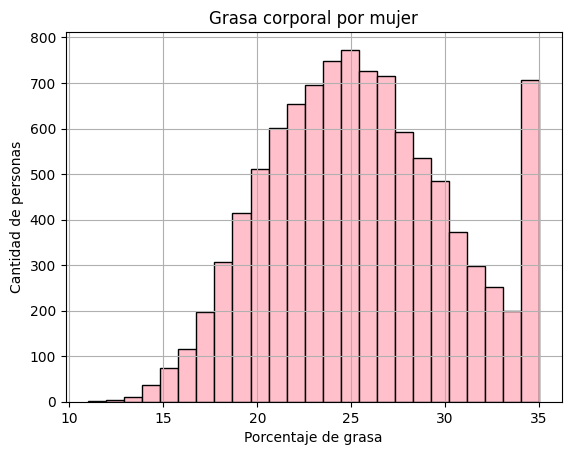

(25,)


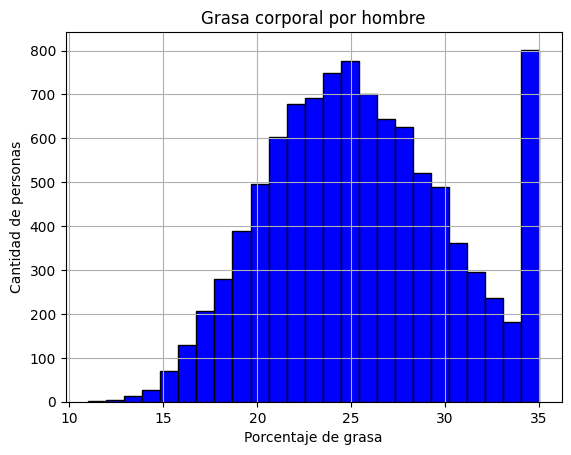

In [23]:
def fat_count(df, title, color="green"):
	df["fat_percentage"].sort_values()
	#con esto observo cuantos valores diferentes unicos tenemos, en este caso 25
	print(df["fat_percentage"].value_counts().shape)
	plt.grid()
	plt.hist(
		df["fat_percentage"],
		bins = 25,
		edgecolor='black',
		color = color,
	)
	plt.title(title)
	plt.xlabel("Porcentaje de grasa")
	plt.ylabel("Cantidad de personas")
	plt.show()
fat_count(df_fitness_female, "Grasa corporal por mujer", "pink")
fat_count(df_fitness_male, "Grasa corporal por hombre", "blue")


La cantidad maxima recomendada de azucar por dia es de Hombres: 36 gramos, Mujeres: 25 gramos. En las siguientes tablas podemos ver que cantidad de hombres y mujeres estan comiendo mas azucar diario del recomendado, siendo asi una de las posibilidades de por que hay tanto sobrepeso y obesidad en el caso de las mujeres

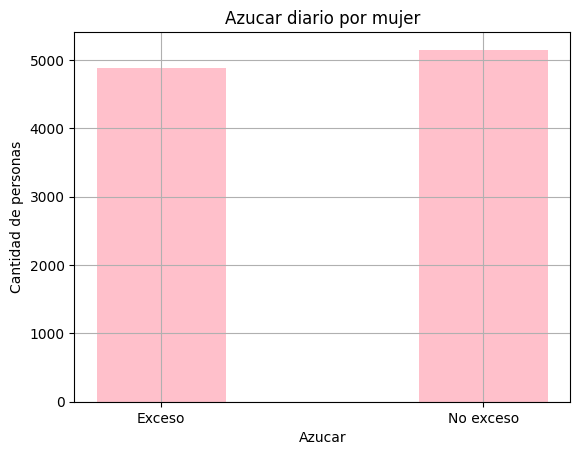

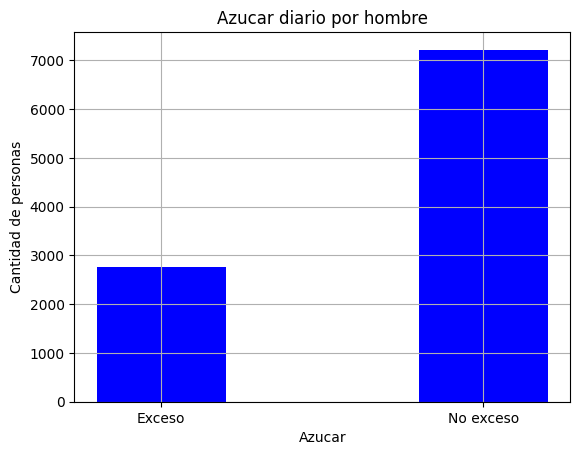

In [24]:
def daily_sugar(df, title, quantity, color = "green"):
	plt.grid()
	plt.bar(
		["Exceso", "No exceso"],
		[df[df["sugar_g"] > quantity].shape[0], df[df["sugar_g"] < quantity].shape[0]],
		width = 0.4,
		color = color
	)
	plt.title(title)
	plt.xlabel("Azucar")
	plt.ylabel("Cantidad de personas")
	plt.show()
daily_sugar(df_fitness_female, "Azucar diario por mujer", 25, "pink")
daily_sugar(df_fitness_male, "Azucar diario por hombre", 36, "blue")

Una persona que hace deporte, como es en el 100% de las personas de este estudio, tiene que ingerir una cantidad concreta de hidratos de carbono diarios, para calcularlo seria 4g * pesokg = resultado en gramos de hidratos de carbono diarios, es decir, si tenemos una persona que pesa 75kg, 75 * 4 = 300, por tanto esa persona su valor ideal de hidratos de carbono al dia es de 300g. Con esto en mente, podemos ver a continuacion la cantidad de personas que tienen exceso de hidratos de carbono, por tanto, podria ser un motivo de ese sobrepeso y obesidad.

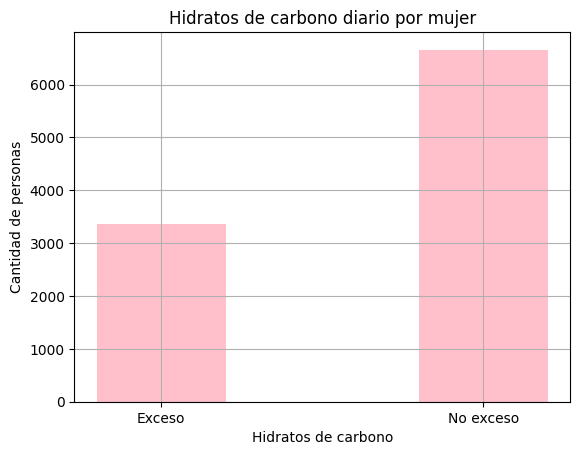

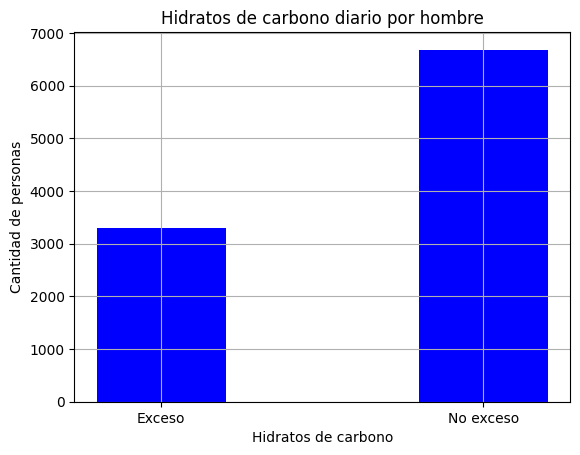

In [25]:
def carbohidratos_peso (df):
	'''
	esta funcion me calcula si una persona esta comiendo mas hidratos de carbono de lo que deberia segun su peso,
	devuelve dos variables que serian el numero de personas que tienen exceso y las que no,
	para ello, recibimos un dataframe, que luego recorreremos todas sus filas, axcediendo a su peso y sus hidratos de carbono diarios,
	una persona que hace deporte, como es en el 100% de las personas de este estudio, tiene que comer 4g * pesokg = resultado en gramos de hidratos de carbono diarios,
	entonces, si tenemos una persona que pesa 75kg, 75 * 4 = 300, por tanto esa persona su valor ideal de hidratos de carbono al dia es de 300g
	'''
	#declaro las dos variables para contabilizar el exceso
	exceso = 0
	no_exceso = 0
	#reseteo el index del dataframe para poder recorrerlo
	df = df.reset_index()
	#recorremos cada fila del dataframe usando el .shape[0] como longitud ya que son el numero de filas
	for index in range(df.shape[0]):
		#la condicion es, si come mas cantidad de hidratos de carbono de lo que deberia, tiene exceso
		#por tanto calculamos su cantidad siendo 4 * su peso
		if df.at[index, "carbs"] > (4 * df.at[index, "weight_kg"]):
			exceso += 1
		else:
			no_exceso += 1
	return exceso, no_exceso

def daily_carbs(count, title, color = "green"):
	plt.grid()
	plt.bar(
		["Exceso", "No exceso"],
		[count[0], count[1]],
		width = 0.4,
		color = color
	)
	plt.title(title)
	plt.xlabel("Hidratos de carbono")
	plt.ylabel("Cantidad de personas")
	plt.show()

#aqui guardamos la lista con los dos resultados de la cuenta
count = carbohidratos_peso(df_fitness_female)
daily_carbs(count, "Hidratos de carbono diario por mujer", "pink")
count = carbohidratos_peso(df_fitness_male)
daily_carbs(count, "Hidratos de carbono diario por hombre", "blue")
